# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [27]:
%pip install iso3166

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [28]:
%pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [29]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# These might be helpful:
from iso3166 import countries

### Notebook Presentation

In [30]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [31]:
df_data = pd.read_csv('data/mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [32]:
#  What is the shape of `df_data`?: 
df_data.shape

(4324, 9)

In [33]:
# How many rows and columns does it have?:
print(f"Total Rows: {df_data.shape[0]}")
print(f"Total Columns: {df_data.shape[1]}")

Total Rows: 4324
Total Columns: 9


In [34]:
# What are the column names?:
for idx, col_name in enumerate(df_data.columns):
    print(f"Column Name {idx}: {col_name}")


Column Name 0: Unnamed: 0.1
Column Name 1: Unnamed: 0
Column Name 2: Organisation
Column Name 3: Location
Column Name 4: Date
Column Name 5: Detail
Column Name 6: Rocket_Status
Column Name 7: Price
Column Name 8: Mission_Status


In [35]:
# Are there any NaN values or duplicates?:
# NaN Values:

if df_data.isnull().values.any():
    print("There are NaN in the Dataframe")
else:
    print("There are not NaN in the Dataframe")

print("Total quantity of NaN per column:")
print(df_data.isnull().sum())

There are NaN in the Dataframe
Total quantity of NaN per column:
Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64


In [36]:
# Duplicates Values:

if df_data.duplicated().any():
    print("There are Duplicates in the Dataframe")
else:
    print("There are not Duplicates in the Dataframe")

duplicated = df_data.duplicated().sum()
print(f"Number of rows duplicated: {duplicated}")

There are not Duplicates in the Dataframe
Number of rows duplicated: 0


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [37]:
# Delete NaN:
df_clean = df_data.dropna()

# Delete Duplicates:
df_clean = df_clean.drop_duplicates()

# Ensure "Price" column is numeric (handling potential non-numeric values):
df_clean["Price"] = pd.to_numeric(df_clean["Price"], errors='coerce')

# Convert the "Price" column to integers:
df_clean["Price"] = df_clean["Price"].fillna(0).astype(int)  # fill NaN with 0 and then convert

# Modify Date Column to datetime and extract only the year:
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce').dt.year.astype('Int64')

# Delete some columns:
df_clean = df_clean.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

# Show the new DataFrame:
df_clean


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020,Atlas V 541 | Perseverance,StatusActive,145,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64,Success
...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966,Titan IIIB | KH-8,StatusRetired,59,Success
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965,Titan IIIA | LES 2 & LCS 1,StatusRetired,63,Success
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965,Titan IIIA | LES 1,StatusRetired,63,Success
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964,Titan IIIA | Transtage 2,StatusRetired,63,Success


## Descriptive Statistics

In [38]:
df_clean.describe(include='all')

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,964,964,958.00,964,964,964.00,964
unique,25,56,<NA>,962,2,NaN,4
top,CASC,"LC-39A, Kennedy Space Center, Florida, USA",<NA>,H-IIA 202 | IGS-Radar 5,StatusActive,NaN,Success
freq,158,120,<NA>,2,586,NaN,910
mean,NaN,NaN,"2,007.52",NaN,NaN,127.61,NaN
std,NaN,NaN,12.49,NaN,NaN,143.10,NaN
min,NaN,NaN,"1,964.00",NaN,NaN,0.00,NaN
25%,NaN,NaN,"2,002.00",NaN,NaN,37.00,NaN
50%,NaN,NaN,"2,011.00",NaN,NaN,62.00,NaN
75%,NaN,NaN,"2,017.00",NaN,NaN,153.00,NaN


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [39]:
launches_per_company = df_clean["Organisation"].value_counts()
print(launches_per_company)


Organisation
CASC               158
NASA               149
SpaceX              99
ULA                 98
Arianespace         96
Northrop            83
ISRO                67
MHI                 37
VKS RF              33
US Air Force        26
Roscosmos           23
Kosmotras           22
Rocket Lab          13
Eurockot            13
ILS                 13
Martin Marietta      9
Lockheed             8
Boeing               7
JAXA                 3
RVSN USSR            2
ExPace               1
Virgin Orbit         1
Sandia               1
ESA                  1
EER                  1
Name: count, dtype: int64


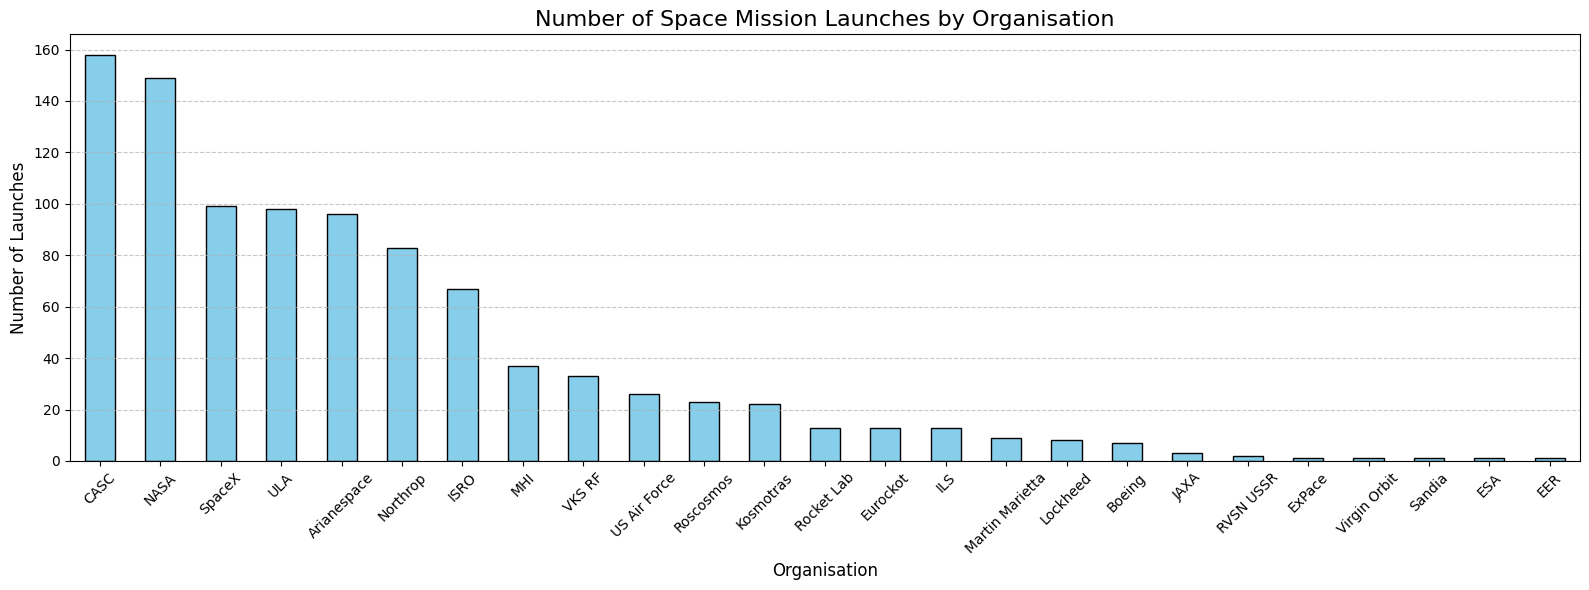

In [40]:
# Create the Chart:
plt.figure(figsize=(16, 6))
launches_per_company.plot(kind="bar", color="skyblue", edgecolor="black")

# Chart Settings:
plt.title("Number of Space Mission Launches by Organisation", fontsize=16)
plt.xlabel("Organisation", fontsize=12)
plt.ylabel("Number of Launches", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the Chart:
plt.tight_layout()
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [41]:
rocket_status = df_clean["Rocket_Status"].value_counts()

active_count = rocket_status.get("StatusActive", 0)
retired_count = rocket_status.get("StatusRetired", 0)

print(f"Status Active: {active_count}")
print(f"Status Retired: {retired_count}")

Status Active: 586
Status Retired: 378


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [42]:
missions = df_clean["Mission_Status"].value_counts()

success = missions.get("Success", 0)
failed = missions.get("Failure", 0)
partial = missions.get("Partial Failure", 0)
prelaunch = missions.get("Prelaunch Failure", 0)

print(f"Status Success: {success}")
print(f"Status Failure: {failed + partial + prelaunch}")

Status Success: 910
Status Failure: 54


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

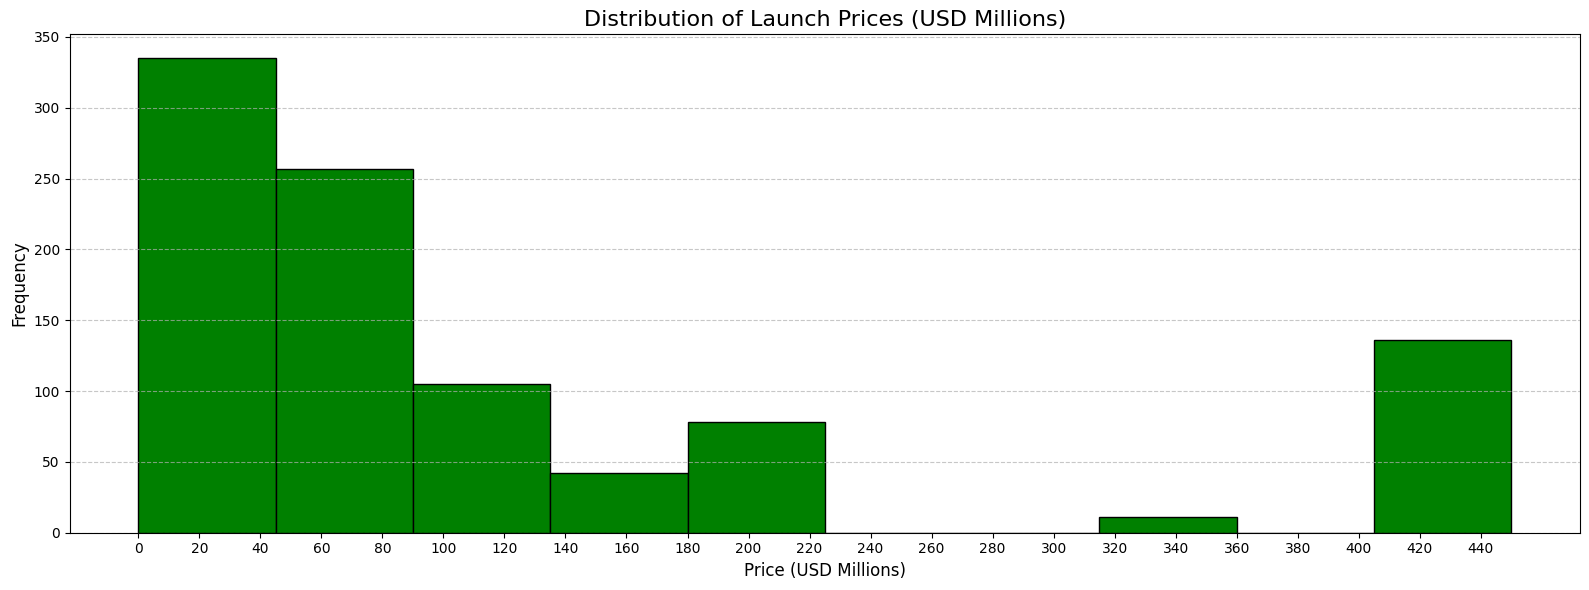

In [43]:
# Crear el histograma con Matplotlib
plt.figure(figsize=(16, 6))
plt.hist(df_clean["Price"], bins=10, color="green", edgecolor="black")
plt.title("Distribution of Launch Prices (USD Millions)", fontsize=16)
plt.xlabel("Price (USD Millions)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.xticks(range(0, int(df_clean["Price"].max()) + 1, 20))  # Show numbers each 20 million dollars.
plt.tight_layout()
plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [44]:
# Mapping known locations to country codes:
known_location_mapping = {
    "Yellow Sea": "CHN",
    "New Mexico": "USA",
    "Pacific Missile Range Facility": "USA",
    "Barents Sea": "RUS", 
    "Plesetsk Cosmodrome": "RUS",
    "Vostochny Cosmodrome": "RUS",
    "Yasny Cosmodrome": "RUS",
    "Baikonur Cosmodrome": "RUS",
    "Gran Canaria": "USA",
    "Shahrud Missile Test Site": "IRN"
}

# Wrangle country names:
def map_country_code(location):
    # Check if the location is in the known location mapping
    for key, value in known_location_mapping.items():
        if key in location:
            return value

    # Regular expression to find country names at the end of the location string
    country = location.split(",")[-1].strip()

    # Check if the country is available in the iso3166 library
    if country in countries:
        return countries.get(country).alpha3  # Return the 3-letter country code

    return None  # If country is not found, return None

# Apply the mapping to the 'Location' column of df_clean
df_clean['Country_Code'] = df_clean['Location'].apply(map_country_code)

# Check for rows with unmapped countries (for debugging)
unmapped_countries = df_clean[df_clean['Country_Code'].isna()]

print("Rows with unmapped countries:")
print(unmapped_countries)

# Count launches per country:
country_launches = df_clean.groupby('Country_Code').size().reset_index(name='Launches')

# Choropleth map using Plotly:
fig = px.choropleth(
    country_launches,
    locations="Country_Code",  # country codes column.
    color="Launches",  # the number of launches.
    hover_name="Country_Code",  # display country name on hover.
    color_continuous_scale="matter",  # choose a color scale.
    title="Number of Space Mission Launches by Country"
)

# Show the map:
fig.show()

Rows with unmapped countries:
Empty DataFrame
Columns: [Organisation, Location, Date, Detail, Rocket_Status, Price, Mission_Status, Country_Code]
Index: []


# Use a Choropleth Map to Show the Number of Failures by Country


In [45]:
# Filter the data for failures (Mission_Status == 'Failure'):
df_failures = df_clean[df_clean['Mission_Status'] == 'Failure']

# Count failures per country (grouping by the 'Country_Code'):
failure_count = df_failures.groupby('Country_Code').size().reset_index(name='Failures')

# Choropleth map using Plotly:
fig = px.choropleth(
    failure_count,
    locations="Country_Code", 
    color="Failures",  
    hover_name="Country_Code", 
    color_continuous_scale="reds", 
    title="Number of Launch Failures by Country"
)

# Show the map:
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [46]:

# Create the Sunburst chart:
fig = px.sunburst(
    df_clean,
    height=800,
    path=['Country_Code', 'Organisation', 'Mission_Status'],
    title="Launch Data by Country, Organisation, and Mission Status",
    color='Mission_Status',  
    color_discrete_map={'Success': 'green', 'Failure': 'red', 'Partial Failure': 'orange', 'Prelaunch Failure': 'blue'},  
    maxdepth=3,  
)

# Show the chart
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [47]:
# Group by Organisation and calculate the total amount spent on space missions
total_spent_by_org = df_clean.groupby('Organisation')['Price'].sum().reset_index()

# Sort by total amount spent, descending order
total_spent_by_org = total_spent_by_org.sort_values(by='Price', ascending=False)

# Show the results
print(total_spent_by_org)

       Organisation  Price
14             NASA  61200
0       Arianespace  16344
21              ULA  14798
2              CASC   6243
20           SpaceX   5434
15         Northrop   3930
12              MHI   3528
8              ISRO   2177
22     US Air Force   1550
23           VKS RF   1530
7               ILS   1320
1            Boeing   1241
18        Roscosmos   1180
13  Martin Marietta    719
10        Kosmotras    638
5          Eurockot    533
11         Lockheed    280
9              JAXA    168
17       Rocket Lab     91
4               ESA     37
6            ExPace     28
3               EER     20
19           Sandia     15
24     Virgin Orbit     12
16        RVSN USSR      0


# Analyse the Amount of Money Spent by Organisation per Launch

In [48]:
# Group by Organisation and calculate total price and number of launches:
org_launch_data = df_clean.groupby('Organisation').agg(
    total_spent=('Price', 'sum'),  # Total amount spent on launches.
    num_launches=('Price', 'size')  # Number of launches per organisation.
).reset_index()

# Calculate the amount spent per launch
org_launch_data['price_per_launch'] = org_launch_data['total_spent'] / org_launch_data['num_launches']

# Sort by price per launch, descending order
org_launch_data = org_launch_data.sort_values(by='price_per_launch', ascending=False)

# Show the results:
print(org_launch_data)

       Organisation  total_spent  num_launches  price_per_launch
14             NASA        61200           149            410.74
1            Boeing         1241             7            177.29
0       Arianespace        16344            96            170.25
21              ULA        14798            98            151.00
7               ILS         1320            13            101.54
12              MHI         3528            37             95.35
13  Martin Marietta          719             9             79.89
22     US Air Force         1550            26             59.62
9              JAXA          168             3             56.00
20           SpaceX         5434            99             54.89
18        Roscosmos         1180            23             51.30
15         Northrop         3930            83             47.35
23           VKS RF         1530            33             46.36
5          Eurockot          533            13             41.00
2              CASC      

# Chart the Number of Launches per Year

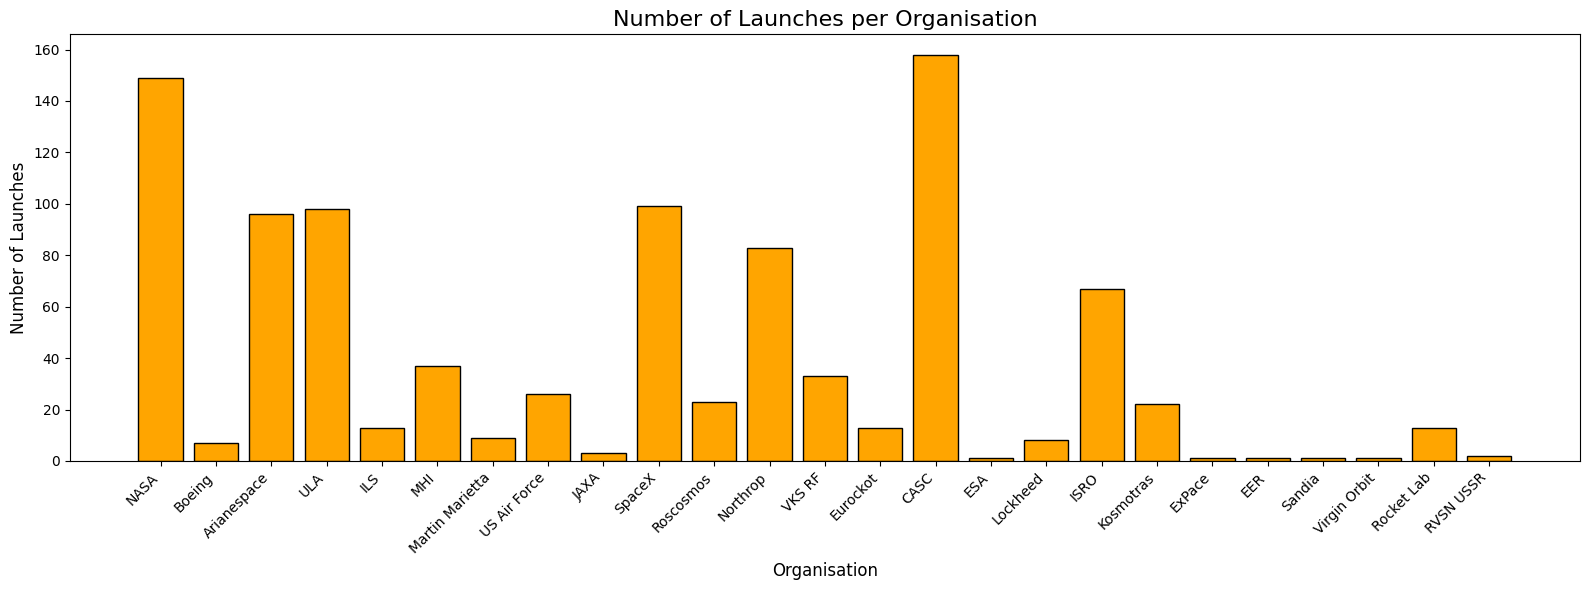

In [49]:
# Bar chart to show the number of launches per organization
plt.figure(figsize=(16, 6))
plt.bar(org_launch_data['Organisation'], org_launch_data['num_launches'], color='orange', edgecolor='black')

# Chart labels and title
plt.title('Number of Launches per Organisation', fontsize=16)
plt.xlabel('Organisation', fontsize=12)
plt.ylabel('Number of Launches', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [50]:
# Filter data for the Cold War period (1947-1991)
cold_war_data = df_clean[df_clean['Date'].between(1947, 1991)]

# Show the new DataFrame with Cold War data
cold_war_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_Code
1724,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1991,Space Shuttle Atlantis | STS-44,StatusRetired,450,Success,USA
1732,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1991,Space Shuttle Discovery | STS-48,StatusRetired,450,Success,USA
1741,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1991,Space Shuttle Atlantis | STS-43,StatusRetired,450,Success,USA
1743,Northrop,"NB-52B Carrier, Edwards AFB, California, USA",1991,Pegasus/HAPS | 7 Microsats,StatusRetired,40,Partial Failure,USA
1750,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1991,Space Shuttle Columbia | STS-40,StatusRetired,450,Success,USA
...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966,Titan IIIB | KH-8,StatusRetired,59,Success,USA
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965,Titan IIIA | LES 2 & LCS 1,StatusRetired,63,Success,USA
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965,Titan IIIA | LES 1,StatusRetired,63,Success,USA
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964,Titan IIIA | Transtage 2,StatusRetired,63,Success,USA


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [51]:
# Filter for USA and USSR only
df_filtered = df_clean[df_clean['Country_Code'].isin(['USA', 'RUS'])]

# Filter for the years between 1947 and 1991
df_filtered = df_filtered[df_filtered['Date'].between(1947, 1991)]

# Count the total number of launches for each country
launch_counts = df_filtered['Country_Code'].value_counts()

# Create a Pie chart using Plotly
fig = px.pie(launch_counts,
             height=600, 
             names=launch_counts.index, 
             values=launch_counts.values, 
             title='Total Number of Launches: USA vs USSR (1947-1991)')

# Show the plot
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [52]:
# Count launches year-on-year by country
launches_yearly = df_filtered.groupby(['Date', 'Country_Code']).size().reset_index(name='Launches')

# Create a line chart showing the total number of launches year-on-year by USA and USSR
fig = px.line(launches_yearly, 
              x='Date', 
              y='Launches', 
              color='Country_Code', 
              title='Total Number of Launches Year-On-Year: USA vs USSR (1947-1991)',
              labels={'Launches': 'Total Launches', 'Date': 'Year'})

# Show the plot
fig.show()